In [1]:
pip install qiskit

In [2]:
import math 
import numpy as np
from qiskit.algorithms import Shor
from qiskit.utils import QuantumInstance
from qiskit import QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram

In [3]:
def a_mod_15(a,power):

  U = QuantumCircuit(4)
  for i in range(power):
    U.swap(2,3)
    U.swap(1,2)
    U.swap(0,1)
    for q in range(4):
      U.x(q)
  U = U.to_gate()
  U.name = "%i^%i mod 15" %(a,power)
  c_U = U.control()
  return c_U

In [4]:
n_count = 8
a = 11

In [5]:
def qft_dagger(n):
  qc = QuantumCircuit(n)
  for qubit in range(n//2):
    qc.swap(qubit,n-qubit-1)
  for j in range(n):
    for m in range(j):
      qc.cu1(-np.pi/float(2**(j-m)),m,j)
    qc.h(j)
  qc.name = "QFT dagger"
  return qc

In [6]:
qc = QuantumCircuit(n_count + 4, n_count)

for q in range(n_count):
  qc.h(q)

qc.x(3+n_count)

for q in range(n_count):
  qc.append(a_mod_15(a,2**q), [q] + [i+n_count for i in range(4)])

qc.append(qft_dagger(n_count), range(n_count))

qc.measure(range(n_count), range(n_count))
qc.draw('text')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  import sys


┌───┐                                                                »
 q_0: ┤ H ├───────■────────────────────────────────────────────────────────»
      ├───┤       │                                                        »
 q_1: ┤ H ├───────┼───────────────■────────────────────────────────────────»
      ├───┤       │               │                                        »
 q_2: ┤ H ├───────┼───────────────┼───────────────■────────────────────────»
      ├───┤       │               │               │                        »
 q_3: ┤ H ├───────┼───────────────┼───────────────┼───────────────■────────»
      ├───┤       │               │               │               │        »
 q_4: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────»
      ├───┤       │               │               │               │        »
 q_5: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────»
      ├───┤       │               │               │               │        »
 q_6: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────»
      ├───┤       │               │               │               │        »
 q_7: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────»
      └───┘┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐»
 q_8: ─────┤0             ├┤0             ├┤0             ├┤0             ├»
           │              ││              ││              ││              │»
 q_9: ─────┤1             ├┤1             ├┤1             ├┤1             ├»
           │  11^1 mod 15 ││  11^2 mod 15 ││  11^4 mod 15 ││  11^8 mod 15 │»
q_10: ─────┤2             ├┤2             ├┤2             ├┤2             ├»
      ┌───┐│              ││              ││              ││              │»
q_11: ┤ X ├┤3             ├┤3             ├┤3             ├┤3             ├»
      └───┘└──────────────┘└──────────────┘└──────────────┘└──────────────┘»
 c: 8/═════════════════════════════════════════════════════════════════════»
                                                                           »
«                                                                           »
« q_0: ─────────────────────────────────────────────────────────────────────»
«                                                                           »
« q_1: ─────────────────────────────────────────────────────────────────────»
«                                                                           »
« q_2: ─────────────────────────────────────────────────────────────────────»
«                                                                           »
« q_3: ─────────────────────────────────────────────────────────────────────»
«                                                                           »
« q_4: ────────■────────────────────────────────────────────────────────────»
«              │                                                            »
« q_5: ────────┼────────────────■───────────────────────────────────────────»
«              │                │                                           »
« q_6: ────────┼────────────────┼────────────────■──────────────────────────»
«              │                │                │                          »
« q_7: ────────┼────────────────┼────────────────┼────────────────■─────────»
«      ┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐┌───────┴────────┐»
« q_8: ┤0              ├┤0              ├┤0              ├┤0               ├»
«      │               ││               ││               ││                │»
« q_9: ┤1              ├┤1              ├┤1              ├┤1               ├»
«      │  11^16 mod 15 ││  11^32 mod 15 ││  11^64 mod 15 ││  11^128 mod 15 │»
«q_10: ┤2              ├┤2              ├┤2              ├┤2               ├»
«      │               ││               ││               ││                │»
«q_11: ┤3              ├┤3              ├┤3              ├┤3               ├»
«      └───────────────┘└───────────────┘└─────────────

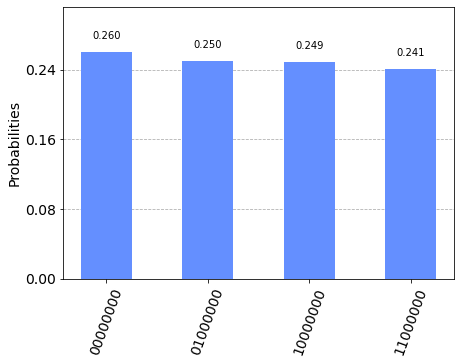

In [7]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots = 2048).result()
counts = results.get_counts()
plot_histogram(counts)

In [8]:
def a_mod_35(a,power):

  b = math.ceil(math.log(35, 2))
  U = QuantumCircuit(b)
  for i in range(power):
    U.swap(4,5)
    U.swap(3,4)
    U.swap(2,3)
    U.swap(1,2)
    U.swap(0,1)
    for q in range(b):
      U.x(q)
  U = U.to_gate()
  U.name = "%i^%i mod 35" %(a,power)
  c_U = U.control()
  return c_U

In [9]:
b = math.ceil(math.log(35, 2))
n_count = 2*b
a = 3

In [10]:
def qft_dagger(n):
  qc = QuantumCircuit(n)
  for qubit in range(n//2):
    qc.swap(qubit,n-qubit-1)
  for j in range(n):
    for m in range(j):
      qc.cp(-np.pi/float(2**(j-m)),m,j)
    qc.h(j)
  qc.name = "QFT dagger"
  return qc

In [11]:
qc = QuantumCircuit(n_count + b, n_count)

for q in range(n_count):
  qc.h(q)

qc.x(b-1+n_count)

for q in range(n_count):
  qc.append(a_mod_35(a,2**q), [q] + [i+n_count for i in range(b)])

qc.append(qft_dagger(n_count), range(n_count))

qc.measure(range(n_count), range(n_count))
qc.draw('text')

┌───┐                                                            »
 q_0: ┤ H ├───────■────────────────────────────────────────────────────»
      ├───┤       │                                                    »
 q_1: ┤ H ├───────┼──────────────■─────────────────────────────────────»
      ├───┤       │              │                                     »
 q_2: ┤ H ├───────┼──────────────┼──────────────■──────────────────────»
      ├───┤       │              │              │                      »
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■───────»
      ├───┤       │              │              │              │       »
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_8: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_9: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
q_10: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
q_11: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      └───┘┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐»
q_12: ─────┤0            ├┤0            ├┤0            ├┤0            ├»
           │             ││             ││             ││             │»
q_13: ─────┤1            ├┤1            ├┤1            ├┤1            ├»
           │             ││             ││             ││             │»
q_14: ─────┤2            ├┤2            ├┤2            ├┤2            ├»
           │  3^1 mod 35 ││  3^2 mod 35 ││  3^4 mod 35 ││  3^8 mod 35 │»
q_15: ─────┤3            ├┤3            ├┤3            ├┤3            ├»
           │             ││             ││             ││             │»
q_16: ─────┤4            ├┤4            ├┤4            ├┤4            ├»
      ┌───┐│             ││             ││             ││             │»
q_17: ┤ X ├┤5            ├┤5            ├┤5            ├┤5            ├»
      └───┘└─────────────┘└─────────────┘└─────────────┘└─────────────┘»
c: 12/═════════════════════════════════════════════════════════════════»
                                                                       »
«                                                                       »
« q_0: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_1: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_2: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_3: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_4: ───────■─────────────────────────────────────────────────────────»
«             │                                                         »
« q_5: ───────┼───────────────■─────────────────────────────────────────»
«             │               │                                         »
« q_6: ───────┼───────────────┼───────────────■─────────────────────────»
«             │               │               │                         »
« q_7: ───────┼───────────────┼───────────────┼──

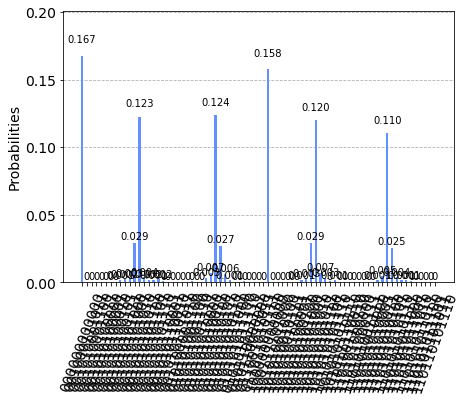

In [12]:
backend = Aer.get_backend('aer_simulator')
results = execute(qc, backend, shots = 2048).result()
counts = results.get_counts()
plot_histogram(counts)

In [13]:
keys = []
for key,value in counts.items():
  if value >= 10:
    print(key)
    keys.append(key)

000000000000
010101010100
101010101010
101010101100
100000000000
110101010110
001010101011
101010101011
001010101010
110101010101
010101010111
010101010110
010101010101
110101010100


In [14]:
import pandas as pd
rows, measured_phases = [], []
for output in keys:
    decimal = int(output, 2) # Convertir el string binario a decimal
    phase = decimal/(2**n_count)  
    measured_phases.append(phase)
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.6f}"])
# Print the rows in a table
headers=["Registro de salida", "Fase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

               Registro de salida                  Fase
0    000000000000(bin) =   0(dec)     0/4096 = 0.000000
1   010101010100(bin) = 1364(dec)  1364/4096 = 0.333008
2   101010101010(bin) = 2730(dec)  2730/4096 = 0.666504
3   101010101100(bin) = 2732(dec)  2732/4096 = 0.666992
4   100000000000(bin) = 2048(dec)  2048/4096 = 0.500000
5   110101010110(bin) = 3414(dec)  3414/4096 = 0.833496
6    001010101011(bin) = 683(dec)   683/4096 = 0.166748
7   101010101011(bin) = 2731(dec)  2731/4096 = 0.666748
8    001010101010(bin) = 682(dec)   682/4096 = 0.166504
9   110101010101(bin) = 3413(dec)  3413/4096 = 0.833252
10  010101010111(bin) = 1367(dec)  1367/4096 = 0.333740
11  010101010110(bin) = 1366(dec)  1366/4096 = 0.333496
12  010101010101(bin) = 1365(dec)  1365/4096 = 0.333252
13  110101010100(bin) = 3412(dec)  3412/4096 = 0.833008


In [15]:
from fractions import Fraction
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
headers=["Fase", "Fraccion", "Guess para r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

        Fase Fraccion  Guess para r
0   0.000000      0/1             1
1   0.333008      1/3             3
2   0.666504      2/3             3
3   0.666992      2/3             3
4   0.500000      1/2             2
5   0.833496      5/6             6
6   0.166748      1/6             6
7   0.666748      2/3             3
8   0.166504      1/6             6
9   0.833252      5/6             6
10  0.333740      1/3             3
11  0.333496      1/3             3
12  0.333252      1/3             3
13  0.833008      5/6             6


In [16]:
from math import gcd

print(gcd(3**(6//2)-1,35))
print(gcd(3**(6//2)+1,35))

1
7


In [17]:
def a_mod_65(a,power):

  b = math.ceil(math.log(65, 2))
  U = QuantumCircuit(b)
  for i in range(power):
    U.swap(5,6)
    U.swap(4,5)
    U.swap(3,4)
    U.swap(2,3)
    U.swap(1,2)
    U.swap(0,1)
    for q in range(b):
      U.x(q)
  U = U.to_gate()
  U.name = "%i^%i mod 65" %(a,power)
  c_U = U.control()
  return c_U

In [18]:
b = math.ceil(math.log(65, 2))
n_count = 2*b
a = 3

In [19]:
def qft_dagger(n):
  qc = QuantumCircuit(n)
  for qubit in range(n//2):
    qc.swap(qubit,n-qubit-1)
  for j in range(n):
    for m in range(j):
      qc.cu1(-np.pi/float(2**(j-m)),m,j)
    qc.h(j)
  qc.name = "QFT dagger"
  return qc

In [20]:
qc = QuantumCircuit(n_count + b, n_count)

for q in range(n_count):
  qc.h(q)

qc.x(b-1+n_count)

for q in range(n_count):
  qc.append(a_mod_65(a,2**q), [q] + [i+n_count for i in range(b)])

qc.append(qft_dagger(n_count), range(n_count))

qc.measure(range(n_count), range(n_count))
qc.draw('text')

┌───┐                                                            »
 q_0: ┤ H ├───────■────────────────────────────────────────────────────»
      ├───┤       │                                                    »
 q_1: ┤ H ├───────┼──────────────■─────────────────────────────────────»
      ├───┤       │              │                                     »
 q_2: ┤ H ├───────┼──────────────┼──────────────■──────────────────────»
      ├───┤       │              │              │                      »
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■───────»
      ├───┤       │              │              │              │       »
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_8: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_9: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
q_10: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
q_11: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
q_12: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
q_13: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      └───┘┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐»
q_14: ─────┤0            ├┤0            ├┤0            ├┤0            ├»
           │             ││             ││             ││             │»
q_15: ─────┤1            ├┤1            ├┤1            ├┤1            ├»
           │             ││             ││             ││             │»
q_16: ─────┤2            ├┤2            ├┤2            ├┤2            ├»
           │             ││             ││             ││             │»
q_17: ─────┤3 3^1 mod 65 ├┤3 3^2 mod 65 ├┤3 3^4 mod 65 ├┤3 3^8 mod 65 ├»
           │             ││             ││             ││             │»
q_18: ─────┤4            ├┤4            ├┤4            ├┤4            ├»
           │             ││             ││             ││             │»
q_19: ─────┤5            ├┤5            ├┤5            ├┤5            ├»
      ┌───┐│             ││             ││             ││             │»
q_20: ┤ X ├┤6            ├┤6            ├┤6            ├┤6            ├»
      └───┘└─────────────┘└─────────────┘└─────────────┘└─────────────┘»
c: 14/═════════════════════════════════════════════════════════════════»
                                                                       »
«                                                                       »
« q_0: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_1: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_2: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_3: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_4: ───────■────────────────────────────────────────

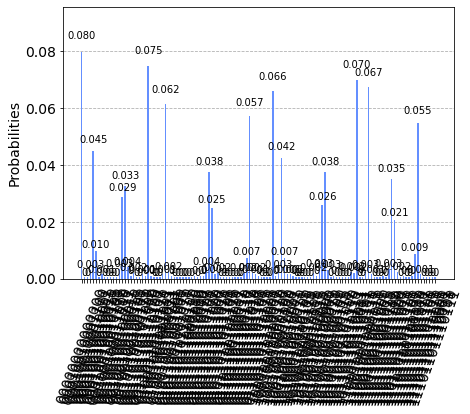

In [21]:
backend = Aer.get_backend('aer_simulator')
results = execute(qc, backend, shots = 2048).result()
counts = results.get_counts()
plot_histogram(counts)

In [22]:
keys = []
for key,value in counts.items():
  if value >= 10:
    print(key)
    keys.append(key)

01101101101101
01011011011011
00010010010010
11001001001001
00100100100100
11101101101101
01011011011100
11011011011011
11101101101110
10110110110111
10010010010010
10100100100100
10010010010011
11011011011100
10100100100101
01101101101110
00110110110111
00010010010011
00100100100101
00000000000000
10000000000000
01001001001001


In [23]:
import pandas as pd
rows, measured_phases = [], []
for output in keys:
    decimal = int(output, 2)  # Convertir el string binario a decimal
    phase = decimal/(2**n_count)  # Determinar el valor propio correspondiente
    measured_phases.append(phase)
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.6f}"])
headers=["Registro de salida", "Fase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

                  Registro de salida                    Fase
0    01101101101101(bin) = 7021(dec)   7021/16384 = 0.428528
1    01011011011011(bin) = 5851(dec)   5851/16384 = 0.357117
2    00010010010010(bin) = 1170(dec)   1170/16384 = 0.071411
3   11001001001001(bin) = 12873(dec)  12873/16384 = 0.785706
4    00100100100100(bin) = 2340(dec)   2340/16384 = 0.142822
5   11101101101101(bin) = 15213(dec)  15213/16384 = 0.928528
6    01011011011100(bin) = 5852(dec)   5852/16384 = 0.357178
7   11011011011011(bin) = 14043(dec)  14043/16384 = 0.857117
8   11101101101110(bin) = 15214(dec)  15214/16384 = 0.928589
9   10110110110111(bin) = 11703(dec)  11703/16384 = 0.714294
10   10010010010010(bin) = 9362(dec)   9362/16384 = 0.571411
11  10100100100100(bin) = 10532(dec)  10532/16384 = 0.642822
12   10010010010011(bin) = 9363(dec)   9363/16384 = 0.571472
13  11011011011100(bin) = 14044(dec)  14044/16384 = 0.857178
14  10100100100101(bin) = 10533(dec)  10533/16384 = 0.642883
15   01101101101110(bin)

In [24]:
from fractions import Fraction
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(20)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator-2])
headers=["Fase", "Fraccion", "Guess para r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

        Fase Fraccion  Guess para r
0   0.428528      3/7             5
1   0.357117     5/14            12
2   0.071411     1/14            12
3   0.785706    11/14            12
4   0.142822      1/7             5
5   0.928528    13/14            12
6   0.357178     5/14            12
7   0.857117      6/7             5
8   0.928589    13/14            12
9   0.714294      5/7             5
10  0.571411      4/7             5
11  0.642822     9/14            12
12  0.571472      4/7             5
13  0.857178      6/7             5
14  0.642883     9/14            12
15  0.428589      3/7             5
16  0.214294     3/14            12
17  0.071472     1/14            12
18  0.142883      1/7             5
19  0.000000      0/1            -1
20  0.500000      1/2             0
21  0.285706      2/7             5


In [25]:
from math import gcd

print(gcd(3**(12//2)-1,65))
print(gcd(3**(12//2)+1,65))

13
5
